## Demonstrating K-Means algorithm

### Importing all necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

### Reading the data


Sample basically takes only 200 samples from the population (To make it easy to visualize and understand

In [3]:
data = pd.read_csv('weatherHistory.csv')
sample = data.sample(200)
df = pd.DataFrame(sample, columns = ('Temperature (C)', 'Humidity'))
print(df)

       Temperature (C)  Humidity
18962        17.722222      0.89
58495        17.761111      0.72
31690         7.883333      0.76
42956         4.883333      0.86
92342        20.983333      0.63
...                ...       ...
16891        12.983333      0.76
40627        15.344444      0.50
17202        20.922222      0.34
5156          2.872222      0.89
54471         6.055556      0.86

[200 rows x 2 columns]


### Displaying the raw data as a scatter plot. We have considered 2 features - Humidity and temperature

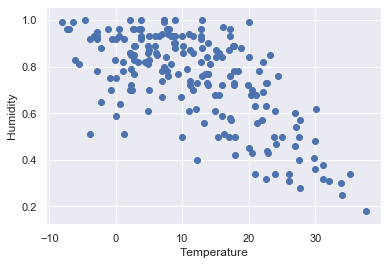

In [4]:
plt.scatter(df['Temperature (C)'], df['Humidity'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

## Normalizing the data and plotting scatter
### The Kmeans algorithm is sensitive to outliers, noise and normalization

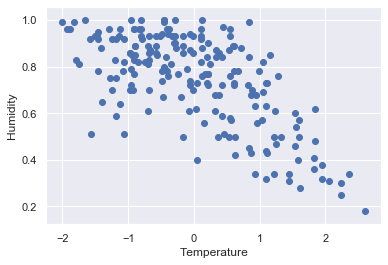

In [5]:
sec = df.copy()
sec.iloc[:,0:-1] = sec.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
plt.scatter(sec['Temperature (C)'], sec['Humidity'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

## Plotting distortion vs number of clusters. (Elbow method)


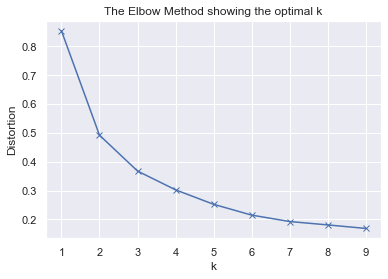

In [6]:
distortions = []
K = range(1,10)
for k in K:
    X = sec.copy()
    kmeans = KMeans(k)
    kmeans.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Silhouette Scores for different clusters

In [7]:
for n_clusters in range(2,7):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(sec)
    centers = clusterer.cluster_centers_

    score = silhouette_score(sec, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5605713829392194)
For n_clusters = 3, silhouette score is 0.508259210207169)
For n_clusters = 4, silhouette score is 0.4826245038859748)
For n_clusters = 5, silhouette score is 0.46075806968881217)
For n_clusters = 6, silhouette score is 0.4590764031295375)


### Copying df into X and using KMeans function (sklearn) and running the algorithm on X. Number of clusters (here) is 4.

In [8]:
X = sec.copy()
kmeans = KMeans(2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Setting a column to show predcited (Assigned) classes for display purpose

In [9]:
clusters =X.copy()
clusters['pred'] = kmeans.fit_predict(X)
print(clusters)

       Temperature (C)  Humidity  pred
18962         0.604861      0.89     0
58495         0.608781      0.72     0
31690        -0.387063      0.76     1
42956        -0.689513      0.86     1
92342         0.933635      0.63     0
...                ...       ...   ...
16891         0.127102      0.76     0
40627         0.365141      0.50     0
17202         0.927474      0.34     0
5156         -0.892267      0.89     1
54471        -0.571334      0.86     1

[200 rows x 3 columns]


### Plotting the data using matplotlib based on assigned clusters.
### We have used the clusters with 'pred' column dataframe for plot

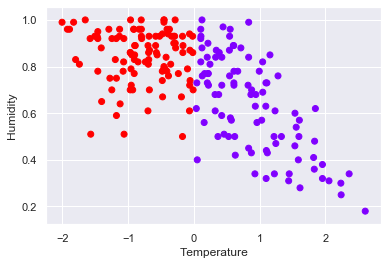

In [10]:
plt.scatter(clusters['Temperature (C)'], clusters['Humidity'], c=clusters['pred'], cmap='rainbow')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

## Plotting with centres

In [11]:
kmeans.cluster_centers_

array([[ 0.86981408,  0.63642105],
       [-0.78697464,  0.84561905]])

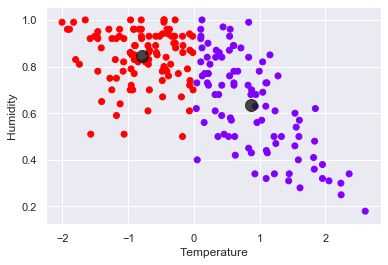

In [12]:
plt.scatter(clusters['Temperature (C)'], clusters['Humidity'], c=clusters['pred'], cmap='rainbow')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
for i in range(0,2):
    plt.plot(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],'ko',markersize = 12,alpha = 0.8 )
plt.show()

## Checking distances of each point from cluster centre and checking if the predictions are right

In [63]:
alldistances = kmeans.transform(sec)
print("--------------------------------------------------")
print("|   Distance to clusters    |  Assigned Cluster  |")
print("|------------------------------------------------|")
for i in range(len(alldistances)):
   print("|  ",format(alldistances[i][0],'0.6f')," | ",format(alldistances[i][1],'0.6f'),"  |   ",clusters['pred'][clusters.index[i]],"              | ")
print("--------------------------------------------------")

--------------------------------------------------
|   Distance to clusters    |  Assigned Cluster  |
|------------------------------------------------|
|   1.392543  |  0.366746   |    0               | 
|   1.401398  |  0.274087   |    0               | 
|   0.408974  |  1.262938   |    1               | 
|   0.098517  |  1.575274   |    1               | 
|   1.734067  |  0.064143   |    0               | 
|   0.879552  |  2.548752   |    1               | 
|   0.178585  |  1.832937   |    1               | 
|   0.312777  |  1.358581   |    1               | 
|   1.615164  |  0.095652   |    0               | 
|   1.626215  |  0.355509   |    0               | 
|   1.052834  |  2.722732   |    1               | 
|   0.484473  |  2.119813   |    1               | 
|   1.012763  |  2.676440   |    1               | 
|   0.485159  |  1.215026   |    1               | 
|   0.618515  |  1.062237   |    1               | 
|   1.175602  |  0.494834   |    0               | 
|   2.780916  |

## Sum of sqaured distances from point to cluster centre (Assigned )
### Essentially average inter - cluster distance

In [66]:
print(kmeans.inertia_/200)

0.33748822112502047


In [68]:
kmeans.get_params(True)

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

# End of notebook